# Churn Prediction For Bank Customer

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Indest Data

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [7]:
df.describe(include=object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [8]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [12]:
df.CustomerId.nunique()

10000

In [13]:
df.Surname.nunique()

2932

In [14]:
df.RowNumber.nunique()

10000

In [15]:
drop_list = ["RowNumber","CustomerId","Surname" ]

In [16]:
df = df.drop(drop_list, axis=1)

In [17]:
df.shape

(10000, 11)

In [18]:
df.duplicated(subset=None, keep='first').sum()

0

In [19]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [20]:
missing(df)

,Missing_Number,Missing_Percent
CreditScore,0,0.000
Geography,0,0.000
Gender,0,0.000
Age,0,0.000
Tenure,0,0.000
Balance,0,0.000
NumOfProducts,0,0.000
HasCrCard,0,0.000
IsActiveMember,0,0.000
EstimatedSalary,0,0.000


In [21]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

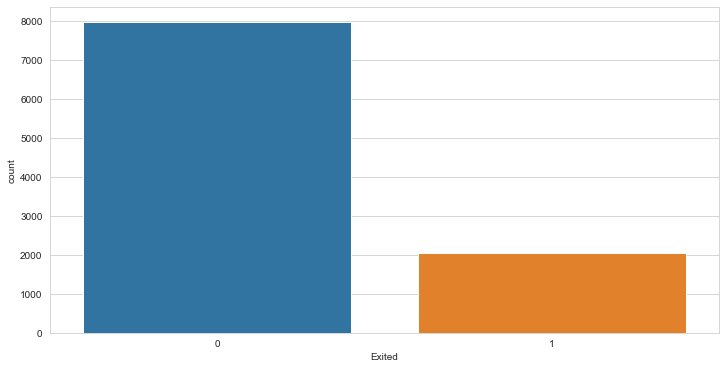

In [22]:
sns.countplot(df["Exited"])

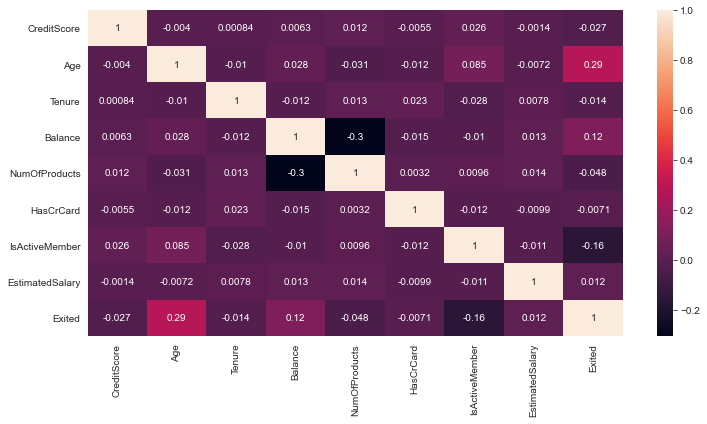

In [23]:
sns.heatmap(df.corr(), annot=True)
plt.show()

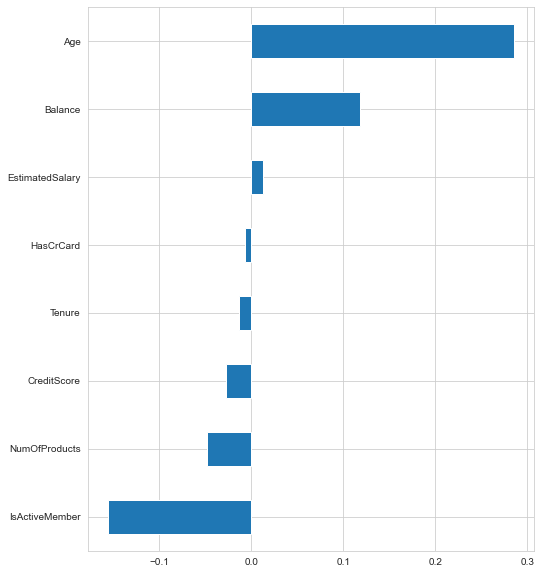

In [24]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

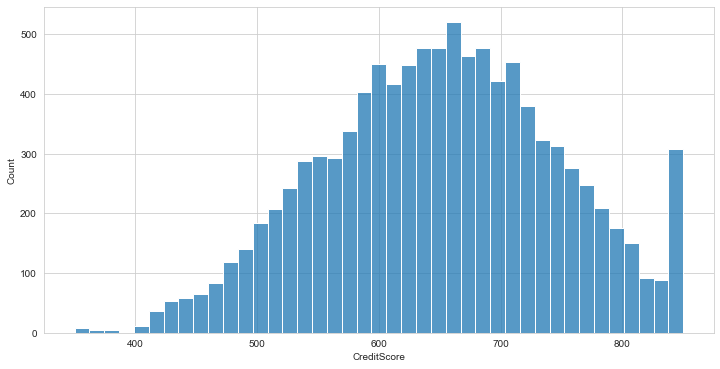

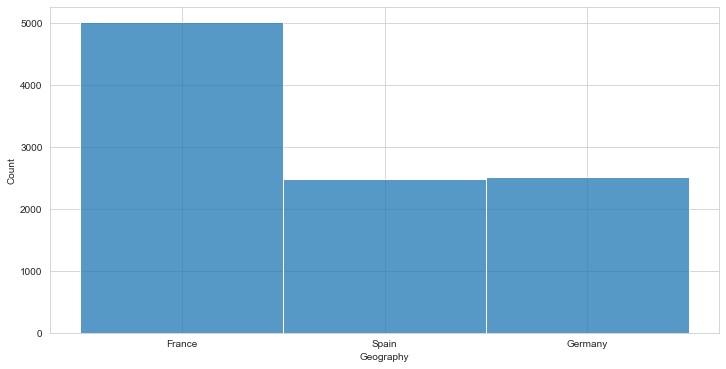

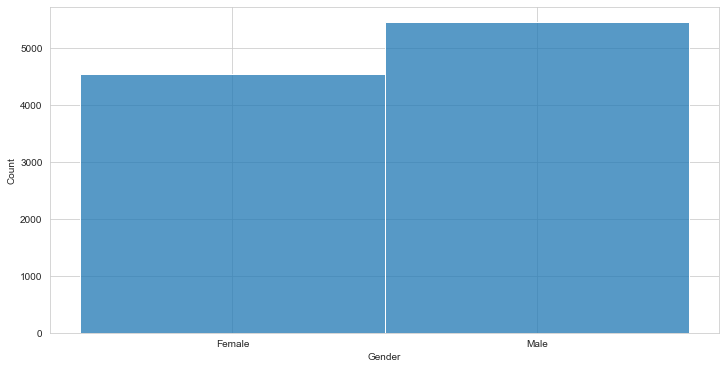

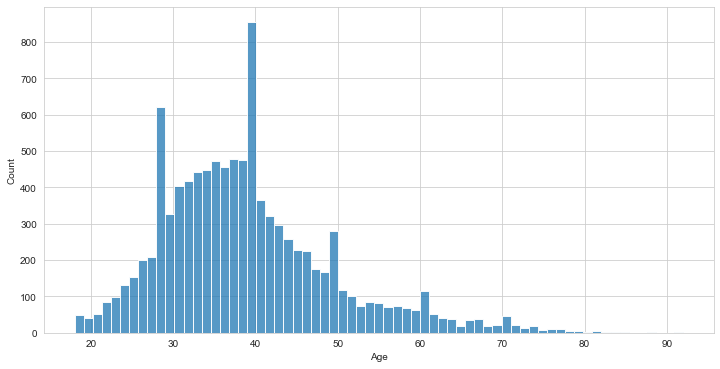

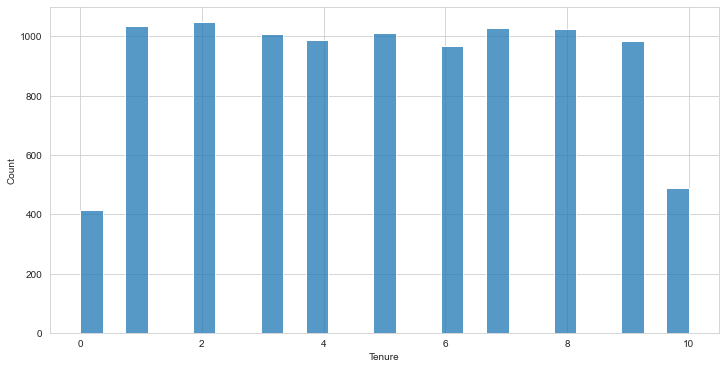

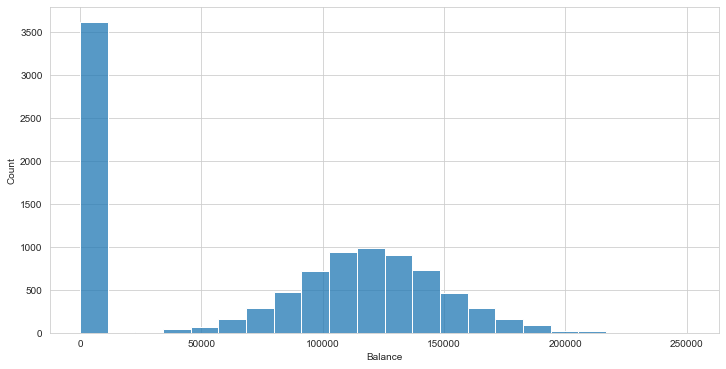

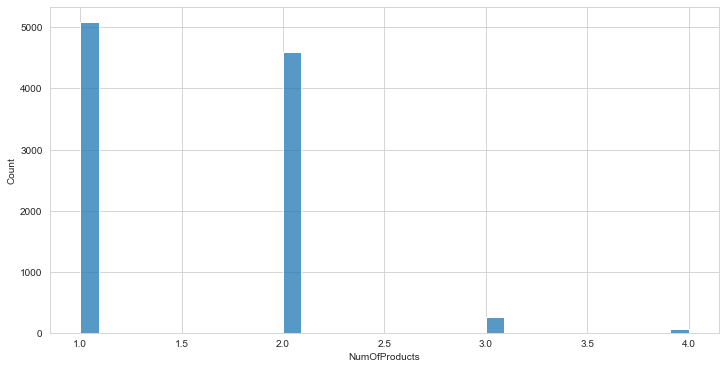

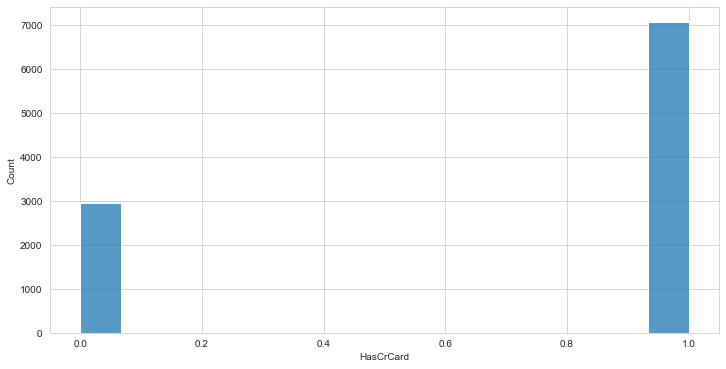

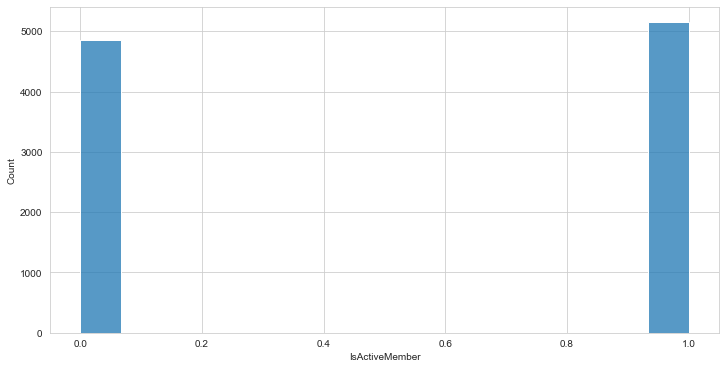

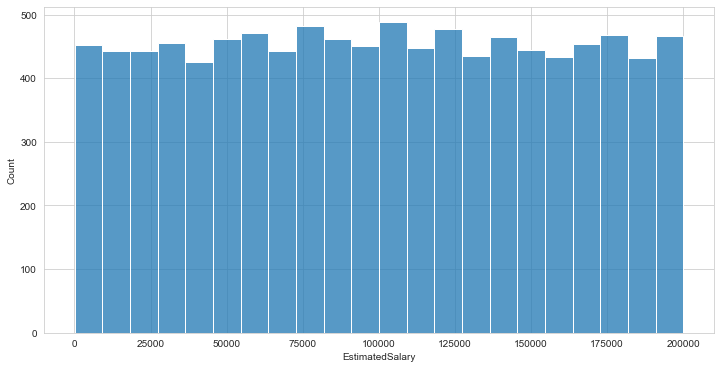

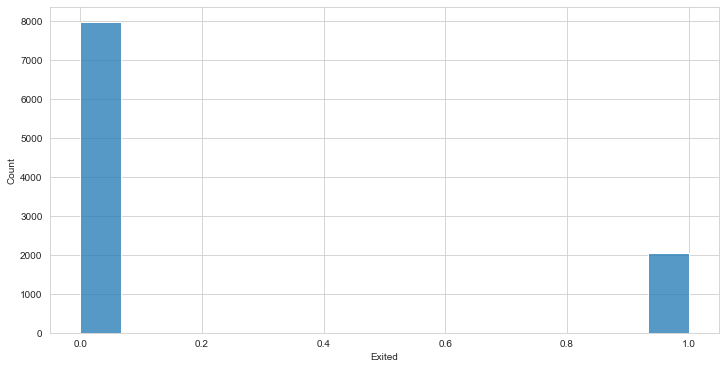

In [25]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

In [26]:
df=pd.get_dummies(df, drop_first=True)

In [27]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


In [66]:
df['Exited'].values

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## Preprocessing of Data
- Train | Test Split, Scalling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [29]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score, recall_score

In [35]:
X_train.shape

(9000, 11)

In [36]:
X_test.shape

(1000, 11)

### Creating Model

### without class_weigth

In [77]:
model = Sequential()

model.add(Dense(15, activation = "relu",input_dim = X_train.shape[1])) 
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))  

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [78]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 1000, verbose=1)

Epoch 1/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.5280 - accuracy: 0.7901 - val_loss: 0.4645 - val_accuracy: 0.8033
Epoch 2/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.8006 - val_loss: 0.4365 - val_accuracy: 0.8200
Epoch 3/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8075 - val_loss: 0.4251 - val_accuracy: 0.8289
Epoch 4/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8109 - val_loss: 0.4169 - val_accuracy: 0.8300
Epoch 5/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.8149 - val_loss: 0.4070 - val_accuracy: 0.8389
Epoch 6/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8141 - val_loss: 0.4004 - val_accuracy: 0.8411
Epoch 7/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8178 - val_loss: 0.3918 - val_accuracy:

127/127 [==============================] - 0s 2ms/step - loss: 0.3365 - accuracy: 0.8602 - val_loss: 0.3019 - val_accuracy: 0.8867
Epoch 114/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8599 - val_loss: 0.3000 - val_accuracy: 0.8856
Epoch 115/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8609 - val_loss: 0.3067 - val_accuracy: 0.8889
Epoch 116/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8628 - val_loss: 0.2993 - val_accuracy: 0.8878
Epoch 117/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8591 - val_loss: 0.2982 - val_accuracy: 0.8856
Epoch 118/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8601 - val_loss: 0.3015 - val_accuracy: 0.8933
Epoch 119/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8630 - val_loss: 0.2985 - val_accuracy: 

127/127 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8630 - val_loss: 0.2967 - val_accuracy: 0.8878
Epoch 226/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8625 - val_loss: 0.2969 - val_accuracy: 0.8833
Epoch 227/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8648 - val_loss: 0.3042 - val_accuracy: 0.8900
Epoch 228/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8627 - val_loss: 0.2970 - val_accuracy: 0.8833
Epoch 229/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8636 - val_loss: 0.2961 - val_accuracy: 0.8911
Epoch 230/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3267 - accuracy: 0.8640 - val_loss: 0.2997 - val_accuracy: 0.8867
Epoch 231/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8617 - val_loss: 0.2934 - val_accuracy: 

127/127 [==============================] - 0s 1ms/step - loss: 0.3211 - accuracy: 0.8657 - val_loss: 0.3058 - val_accuracy: 0.8767
Epoch 338/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8659 - val_loss: 0.2996 - val_accuracy: 0.8856
Epoch 339/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8649 - val_loss: 0.3015 - val_accuracy: 0.8822
Epoch 340/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3219 - accuracy: 0.8664 - val_loss: 0.3018 - val_accuracy: 0.8800
Epoch 341/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3212 - accuracy: 0.8654 - val_loss: 0.2984 - val_accuracy: 0.8833
Epoch 342/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8649 - val_loss: 0.3014 - val_accuracy: 0.8811
Epoch 343/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8667 - val_loss: 0.2987 - val_accuracy: 

127/127 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8674 - val_loss: 0.3022 - val_accuracy: 0.8800
Epoch 450/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.8675 - val_loss: 0.3019 - val_accuracy: 0.8811
Epoch 451/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8665 - val_loss: 0.3038 - val_accuracy: 0.8833
Epoch 452/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8657 - val_loss: 0.3015 - val_accuracy: 0.8822
Epoch 453/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8664 - val_loss: 0.3071 - val_accuracy: 0.8789
Epoch 454/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8670 - val_loss: 0.3030 - val_accuracy: 0.8822
Epoch 455/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8656 - val_loss: 0.3024 - val_accuracy: 

127/127 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8710 - val_loss: 0.3058 - val_accuracy: 0.8844
Epoch 562/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8686 - val_loss: 0.3047 - val_accuracy: 0.8811
Epoch 563/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8679 - val_loss: 0.3047 - val_accuracy: 0.8844
Epoch 564/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8695 - val_loss: 0.3039 - val_accuracy: 0.8844
Epoch 565/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8686 - val_loss: 0.2998 - val_accuracy: 0.8856
Epoch 566/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8674 - val_loss: 0.3038 - val_accuracy: 0.8800
Epoch 567/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8698 - val_loss: 0.3025 - val_accuracy: 

127/127 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8683 - val_loss: 0.3008 - val_accuracy: 0.8800
Epoch 674/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8705 - val_loss: 0.3041 - val_accuracy: 0.8844
Epoch 675/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3127 - accuracy: 0.8696 - val_loss: 0.3053 - val_accuracy: 0.8822
Epoch 676/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8685 - val_loss: 0.3045 - val_accuracy: 0.8811
Epoch 677/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8700 - val_loss: 0.3037 - val_accuracy: 0.8811
Epoch 678/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8698 - val_loss: 0.2997 - val_accuracy: 0.8833
Epoch 679/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8685 - val_loss: 0.3054 - val_accuracy: 

127/127 [==============================] - 0s 1ms/step - loss: 0.3099 - accuracy: 0.8699 - val_loss: 0.3033 - val_accuracy: 0.8844
Epoch 786/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3107 - accuracy: 0.8691 - val_loss: 0.3005 - val_accuracy: 0.8856
Epoch 787/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3107 - accuracy: 0.8695 - val_loss: 0.3018 - val_accuracy: 0.8822
Epoch 788/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8684 - val_loss: 0.3035 - val_accuracy: 0.8778
Epoch 789/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3106 - accuracy: 0.8684 - val_loss: 0.3008 - val_accuracy: 0.8767
Epoch 790/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3104 - accuracy: 0.8702 - val_loss: 0.3028 - val_accuracy: 0.8844
Epoch 791/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.8698 - val_loss: 0.3054 - val_accuracy: 

127/127 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8689 - val_loss: 0.3015 - val_accuracy: 0.8833
Epoch 898/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8688 - val_loss: 0.3031 - val_accuracy: 0.8789
Epoch 899/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8714 - val_loss: 0.3065 - val_accuracy: 0.8756
Epoch 900/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8680 - val_loss: 0.2995 - val_accuracy: 0.8778
Epoch 901/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.3092 - accuracy: 0.8704 - val_loss: 0.3022 - val_accuracy: 0.8800
Epoch 902/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8699 - val_loss: 0.3046 - val_accuracy: 0.8811
Epoch 903/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8696 - val_loss: 0.3048 - val_accuracy: 

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 436
Trainable params: 436
Non-trainable params: 0
_________________________________________________________________


In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.528,0.790,0.465,0.803
1,0.465,0.801,0.436,0.820
2,0.452,0.808,0.425,0.829
3,0.443,0.811,0.417,0.830
4,0.436,0.815,0.407,0.839


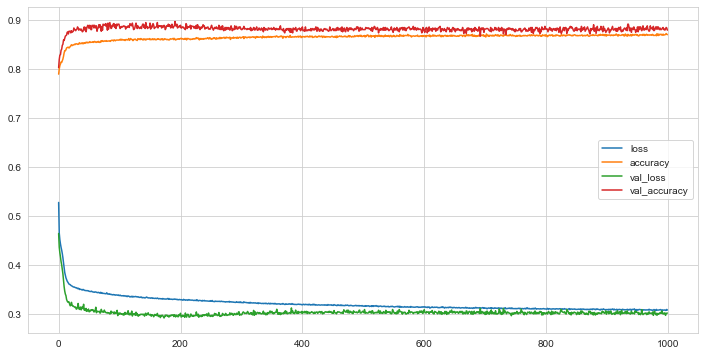

In [81]:
loss_df.plot();

#### Evaluate

In [82]:
model.evaluate(X_test, y_test, verbose=0)

[0.3508245050907135, 0.8560000061988831]

In [83]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3508245050907135
accuracy :  0.8560000061988831


In [84]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")   # 1 olma ihtimali 0.5 ten büyükse 1 yap
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[765  31]
 [113  91]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.45      0.56       204

    accuracy                           0.86      1000
   macro avg       0.81      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



## learning_rate and EarlyStopping

In [40]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
model = Sequential()

model.add(Dense(15, activation = "relu",input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [88]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [89]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
127/127 [==============================] - 1s 2ms/step - loss: 0.5482 - accuracy: 0.7338 - val_loss: 0.4717 - val_accuracy: 0.7989
Epoch 2/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.7995 - val_loss: 0.4334 - val_accuracy: 0.8133
Epoch 3/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8083 - val_loss: 0.4108 - val_accuracy: 0.8311
Epoch 4/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8164 - val_loss: 0.3871 - val_accuracy: 0.8422
Epoch 5/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8296 - val_loss: 0.3485 - val_accuracy: 0.8633
Epoch 6/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8427 - val_loss: 0.3273 - val_accuracy: 0.8789
Epoch 7/1000
127/127 [==============================] - 0s 2ms/step - loss: 0.3636 - accuracy: 0.8523 - val_loss: 0.3164 - val_accuracy:

<AxesSubplot:>

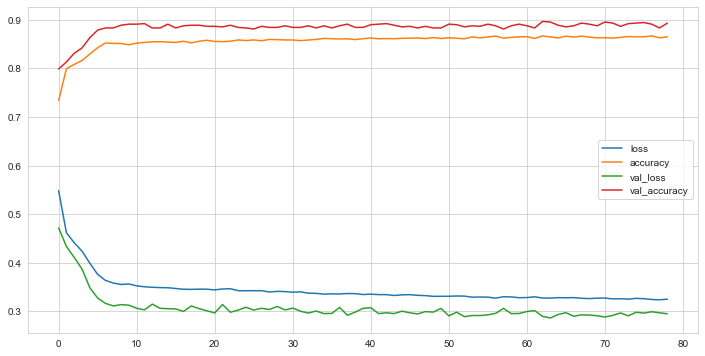

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate

In [91]:
model.evaluate(X_test, y_test, verbose=0)

[0.33458277583122253, 0.8600000143051147]

In [92]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33458277583122253
accuracy :  0.8600000143051147


In [93]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[766  30]
 [110  94]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.76      0.46      0.57       204

    accuracy                           0.86      1000
   macro avg       0.82      0.71      0.74      1000
weighted avg       0.85      0.86      0.85      1000



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

##https://towardsdatascience.com/handling-imbalanced-datasets-in-deep-learning-f48407a0e758
##https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

In [41]:
from sklearn.utils import class_weight

In [42]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [96]:
class_weights

array([0.62787777, 2.45499182])

In [97]:
model_weigth= Sequential()

model_weigth.add(Dense(15, activation = "relu",input_dim = X_train.shape[1]))
model_weigth.add(Dense(15, activation = "relu"))
model_weigth.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model_weigth.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [98]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [99]:
class_weight = {0: 0.62787777, 1: 2.45499182} 

In [100]:
model_weigth.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1,
          callbacks = [early_stop], class_weight={0: 0.62787777, 1: 2.45499182})

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6799 - accuracy: 0.6421 - val_loss: 0.6588 - val_accuracy: 0.6367
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6474 - val_loss: 0.5829 - val_accuracy: 0.7089
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.6667 - val_loss: 0.5763 - val_accuracy: 0.7289
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.6775 - val_loss: 0.5835 - val_accuracy: 0.7111
Epoch 5/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5854 - accuracy: 0.6947 - val_loss: 0.5506 - val_accuracy: 0.7356
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7098 - val_loss: 0.5089 - val_accuracy: 0.7667
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.7210 - val_loss: 0.5332 - val_accuracy:

In [101]:
model_weigth.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 15)                180       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 436
Trainable params: 436
Non-trainable params: 0
_________________________________________________________________


In [102]:
loss_df = pd.DataFrame(model_weigth.history.history)
loss_df.tail()

,loss,accuracy,val_loss,val_accuracy
104,0.452,0.790,0.425,0.801
105,0.451,0.792,0.381,0.849
106,0.451,0.793,0.473,0.751
107,0.452,0.785,0.417,0.811
108,0.451,0.788,0.424,0.804


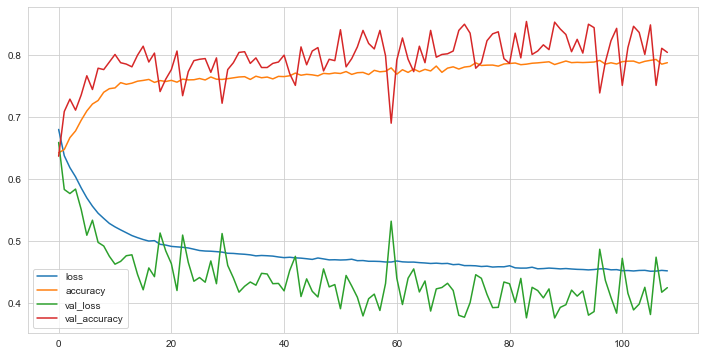

In [103]:
loss_df.plot();

In [105]:
model_weigth.evaluate(X_test, y_test, verbose=0)

[0.4759135842323303, 0.7770000100135803]

In [106]:
loss, accuracy = model_weigth.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4759135842323303
accuracy :  0.7770000100135803


In [107]:
y_pred = (model_weigth.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[613 183]
 [ 40 164]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       796
           1       0.47      0.80      0.60       204

    accuracy                           0.78      1000
   macro avg       0.71      0.79      0.72      1000
weighted avg       0.84      0.78      0.79      1000



## GridSearchCV

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [67]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 15, activation = 'relu',input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [68]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 15)

In [69]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Epoch 1/200
282/282 [==============================] - 1s 996us/step - loss: 0.5112 - accuracy: 0.7938
Epoch 2/200
282/282 [==============================] - 0s 981us/step - loss: 0.4585 - accuracy: 0.8011
Epoch 3/200
282/282 [==============================] - 0s 968us/step - loss: 0.4377 - accuracy: 0.8099
Epoch 4/200
282/282 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8189
Epoch 5/200
282/282 [==============================] - 0s 963us/step - loss: 0.4146 - accuracy: 0.8241
Epoch 6/200
282/282 [==============================] - 0s 979us/step - loss: 0.4046 - accuracy: 0.8286
Epoch 7/200
282/282 [==============================] - 0s 992us/step - loss: 0.3959 - accuracy: 0.8322
Epoch 8/200
282/282 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8377
Epoch 9/200
282/282 [==============================] - 0s 980us/step - loss: 0.3761 - accuracy: 0.8419
Epoch 10/200
2

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000238879C65B0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'optimizer': ['adam', 'rmsprop', 'SGD', 'adagrad',
                                       'adadelta']},
             scoring='accuracy', verbose=1)

In [72]:
grid_model.best_score_

0.8582222222222222

In [73]:
grid_model.best_params_

{'batch_size': 32, 'optimizer': 'adam'}

## Final Model and Model Deployment

In [37]:
scaler = MinMaxScaler().fit(X)

In [38]:
import pickle
pickle.dump(scaler, open("Churn_Prediction", 'wb'))

In [43]:
model_weigth= Sequential()

model_weigth.add(Dense(15, activation = "relu",input_dim = X_train.shape[1]))
model_weigth.add(Dense(15, activation = "relu"))
model_weigth.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model_weigth.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [44]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [45]:
model_weigth.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1,
          callbacks = [early_stop], class_weight={0: 0.62787777, 1: 2.45499182})

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.6737 - accuracy: 0.5967 - val_loss: 0.6546 - val_accuracy: 0.6822
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.6591 - val_loss: 0.5642 - val_accuracy: 0.7222
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.6780 - val_loss: 0.5485 - val_accuracy: 0.7311
Epoch 4/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.6888 - val_loss: 0.5972 - val_accuracy: 0.6856
Epoch 5/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5809 - accuracy: 0.6948 - val_loss: 0.5900 - val_accuracy: 0.6844
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.6967 - val_loss: 0.5731 - val_accuracy: 0.7056
Epoch 7/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.5683 - accuracy: 0.7064 - val_loss: 0.5349 - val_accuracy:

<AxesSubplot:>

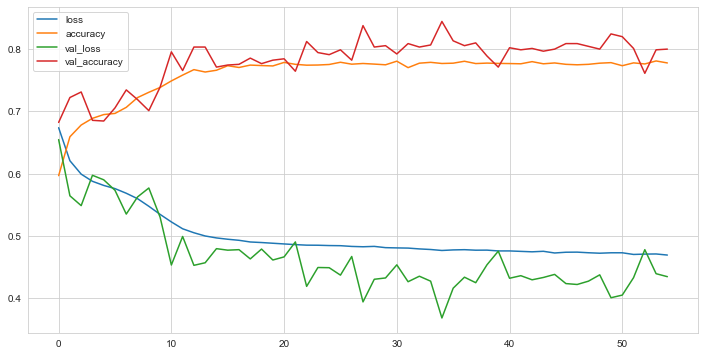

In [46]:
loss_df = pd.DataFrame(model_weigth.history.history)
loss_df.plot()

In [47]:
y_pred = (model_weigth.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[608 188]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       796
           1       0.45      0.76      0.57       204

    accuracy                           0.76      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.83      0.76      0.78      1000



In [52]:
model_weigth.save('model_Churn.h5')

## Loading Model and Scaler

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model_fake_reg = load_model('model_Churn.h5')

In [55]:
 Churn_Prediction = pickle.load(open("Churn_Prediction", "rb"))

### Prediction

In [56]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


In [57]:
single_patient = df.drop('Exited', axis = 1).iloc[0:1, :]
single_patient

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,0,0,0


In [58]:
single_patient = Churn_Prediction.transform(single_patient)
single_patient

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [61]:
(model_weigth.predict(single_patient) > 0.5).astype("int32")

array([[1]])

In [62]:
df["Exited"].iloc[0]

1